In [66]:
pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import StratifiedKFold

In [68]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
import pandas as pd
import numpy as np

In [71]:
data = pd.read_csv('C:\ALDA\Project\oil_merge_13.csv')

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
data.head()

,Date,WTI_dollar_per_barrel,copper_close,dji_index,gold_close,eur_close,Henry Hub Natural Gas Spot Price Dollars per Million Btu,rub_close,silver_close,nasdaq_close,SP500,pal_close,corn_close,heat_close
0,2003-12-01,29.89,0.9555,9899.049805,402.700012,0.83577,5.02,29.700001,5.445,1989.819946,1070.119995,189.000000,246.50,0.8340
1,2003-12-02,30.74,0.9695,9853.639648,403.700012,0.82720,5.45,29.690001,5.496,1980.069946,1066.619995,192.750000,245.75,0.8626
2,2003-12-03,30.61,0.9760,9873.419922,403.899994,0.82488,5.45,29.690001,5.468,1960.250000,1064.729980,192.350006,249.25,0.8662
3,2003-12-04,31.24,0.9630,9930.820312,403.299988,0.82775,5.70,29.680000,5.452,1968.800049,1069.719971,198.399994,246.75,0.8819
4,2003-12-05,30.68,0.9690,9862.679688,406.399994,0.82055,6.27,29.620001,5.472,1937.819946,1061.500000,201.300003,246.50,0.8636


In [75]:
data = data.drop('Date', axis = 'columns')

In [76]:
min_max_scaler = MinMaxScaler()
min_max_normalized_data = min_max_scaler.fit_transform(data)

In [77]:
min_max_normalized_df = pd.DataFrame(min_max_normalized_data)

In [78]:
X = min_max_normalized_df.iloc[:, 1:]
y = min_max_normalized_df.iloc[:, 0]

In [79]:
Xx = pd.DataFrame(min_max_normalized_df.iloc[:, 1:])
yy = pd.DataFrame(min_max_normalized_df.iloc[:, 0])

Xx.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000000,0.145712,0.018429,0.624128,0.163782,0.352670,0.000000,0.084363,0.119357,0.010416,0.093411,0.000000
1,0.003817,0.143738,0.019090,0.598694,0.182867,0.352549,0.001182,0.083222,0.118295,0.011868,0.092248,0.008741
2,0.005590,0.144597,0.019222,0.591809,0.182867,0.352549,0.000533,0.080904,0.117722,0.011713,0.097674,0.009841
3,0.002045,0.147093,0.018826,0.600327,0.193964,0.352427,0.000162,0.081904,0.119236,0.014056,0.093798,0.014639
4,0.003681,0.144131,0.020873,0.578958,0.219263,0.351697,0.000626,0.078280,0.116743,0.015179,0.093411,0.009046


## Lasso Regression

In [80]:
from sklearn.linear_model import Lasso

alpha = 0.001  # Adjust the regularization strength (hyperparameter)
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X, y)

# Get selected features
selected_features = X.columns[lasso_model.coef_ != 0]

# Print selected features
print('Selected Features:', selected_features)


Selected Features: Index([1, 2, 4, 9, 12], dtype='int64')


In [81]:
print(lasso_model.coef_)

[ 0.01243424 -0.13149496  0.         -0.11511973  0.         -0.
 -0.         -0.          0.18138558  0.          0.          0.46292002]


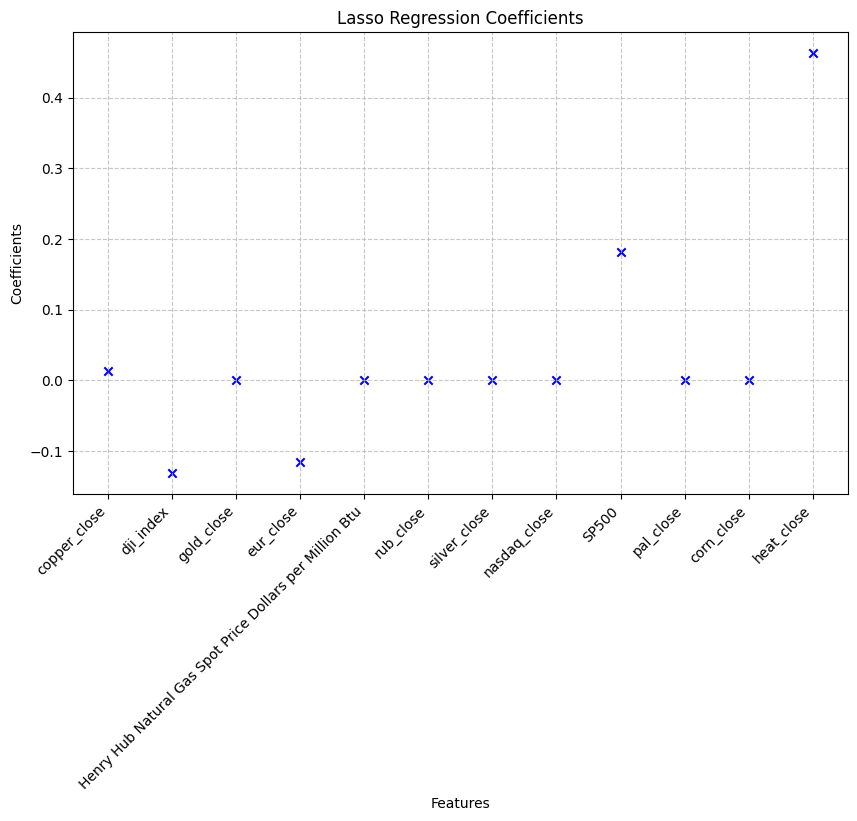

In [62]:
# Get the coefficients and feature names
coefficients = lasso_model.coef_
feature_names = data.columns.tolist()

feature_names.remove('WTI_dollar_per_barrel')

# Plot coefficients against feature names using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(feature_names, coefficients, marker='x', color='blue')
plt.title('Lasso Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

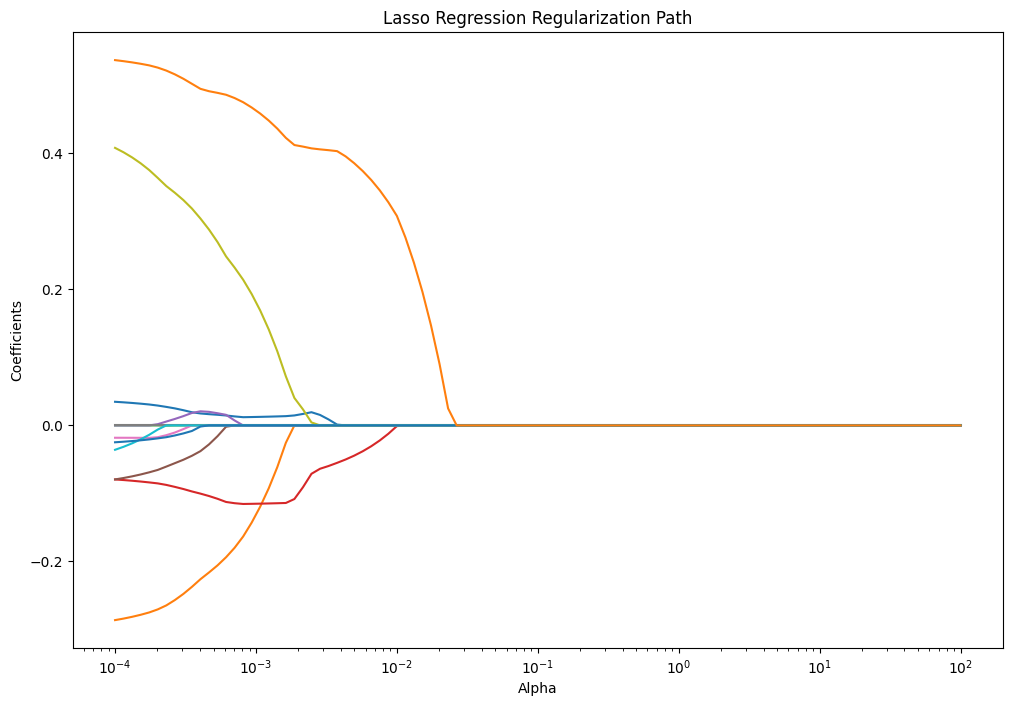

In [82]:
import matplotlib.pyplot as plt
alphas = np.logspace(-4, 2, 100)
coefs = []

for a in alphas:
    lasso_model = Lasso(alpha=a)
    lasso_model.fit(X, y)
    coefs.append(lasso_model.coef_)

plt.figure(figsize=(12, 8))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Regression Regularization Path')
plt.show()

In [83]:
feature_names = data.columns.tolist()

feature_names.remove('WTI_dollar_per_barrel')

print([feature_names[i-1] for i in selected_features])

['copper_close', 'dji_index', 'eur_close', 'SP500', 'heat_close']


In [84]:
from sklearn.linear_model import LassoLarsIC

# Create a LassoLarsIC model
model_bic = LassoLarsIC(criterion='bic')
model_bic.fit(X, y)

# Get the best alpha according to BIC
best_alpha_bic = model_bic.alpha_
print(best_alpha_bic)

1.507084815188837e-05


## RFE

In [85]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfe = RFE(model)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True  True  True False False  True False False  True]
[6 7 1 1 1 1 4 3 1 2 5 1]


In [41]:
pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/40/d9/c1784db9db0d484c8e5deeafbaac0d6ed66e165c6eb4a74fb43a5fa947d9/matplotlib-3.8.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/e5/76/94bc17eb868f8c7397f8fdfdeae7661c1b9a35f3a7219da308596e8c252a/contourpy-1.1.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/ae/f6/724d2d236797ea7479a5a7ec8e69c2bee60cad70273cf25078810415ae2d/fonttools-4.43.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/155.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/155.5 kB ? eta -:

In [87]:
data.rename(columns = {'Henry Hub Natural Gas Spot Price Dollars per Million Btu':'Henry Hub Natural Gas'}, inplace = True)

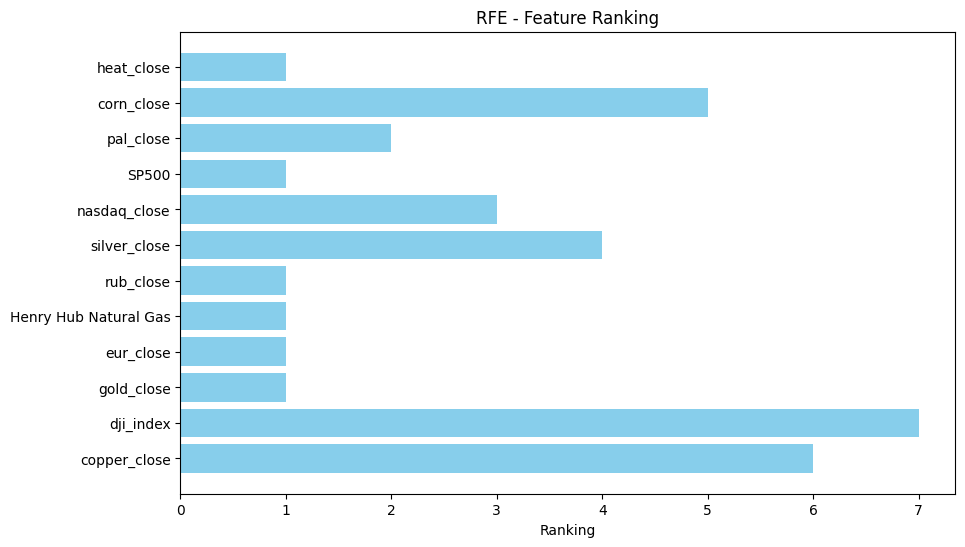

In [88]:
import matplotlib.pyplot as plt

feature_ranking = rfe.ranking_

feature_names = data.columns.tolist()

feature_names.remove('WTI_dollar_per_barrel')
# Get the names of the features



# Create a bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_ranking, color='skyblue')
plt.xlabel('Ranking')
plt.title('RFE - Feature Ranking')
plt.show()

In [63]:
data.columns

Index(['WTI_dollar_per_barrel', 'copper_close', 'dji_index', 'gold_close',
       'eur_close', 'Henry Hub Natural Gas Spot Price Dollars per Million Btu',
       'rub_close', 'silver_close', 'nasdaq_close', 'SP500', 'pal_close',
       'corn_close', 'heat_close'],
      dtype='object')